รหัส: 6304101331

ชื่อ-นามสกุล: นายธนกิจ สุภะกรรม

กลุ่ม: 2

### จุดประสงค์
1. เพื่อให้นักศึกษาสามารถเขียนโปรแกรมเพื่อแสดงกราฟของการเกิด Deadlock ในระบบปฏิบัติการ
2. เพื่อประยุกต์ความรู้เชิงภาษาศาสตร์

### การวัดผล
1. สร้างไฟล์ non-deadlock.txt (ระดับ 5 คะแนน)
2. กำหนดประโยคภาษาไทยจำนวน 20 ประโยค พร้อมทั้งสร้างความสัมพันธ์โดยไม่เกิด deadlock จากจำนวนประโยคทั้งหมด (ระดับ 10 คะแนน)
3. สร้างไฟล์ deadlock.txt (ระดับ 15 คะแนน)
4. กำหนดประโยคภาษาไทยจำนวน 20 ประโยค สร้างเงื่อนไขการเกิด Dead lock จำนวน 5 ประโยค (ระดับ 20 คะแนน)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# download font thai, update registry
import matplotlib.font_manager as fm
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  after removing the cwd from sys.path.


In [3]:
print("ทดสอบ การทำงาน ภาษาไทย")

ทดสอบ การทำงาน ภาษาไทย


In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
# ทำเฉพาะครั้งแรกเท่านั้น
!git clone https://github.com/Matrix159/CIS452-Resource-Manager

fatal: destination path 'CIS452-Resource-Manager' already exists and is not an empty directory.


In [6]:
%cd /content/drive/MyDrive/CIS452-Resource-Manager

/content/drive/MyDrive/CIS452-Resource-Manager


In [7]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.__version__  

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

import matplotlib.pyplot as plt

In [8]:
import sys
import networkx as nx

"""
This class is used to display a resource allocation graph based off an input file.
@author: Josh Eldridge
"""
class ResourceManager:

    """
    Constructors of class to set up instance variables
    """
    def __init__(self, file_name):
        self.step = 0
        self.numberProcesses = 0
        self.numberResources = 0
        self.system_deadlocked = False
        # String of process
        self.process_list = []
        # String of resource
        self.resource_list = []
        # Strings of each statement
        self.statement_list = []
        # Tuples
        self.request_edges = []
        # Tuples
        self.owned_edges = []
        # Deadlocked processes
        self.deadlocked_processes = []
        # Read input upon construction
        self.read_input(file_name)

    """
    Used to read the input file into our data structures
    """
    def read_input(self, file_name):
        with open(file_name, "r") as f:
            lines = f.readlines()
            self.numberProcesses = int(lines[0].split(" processes")[0])
            self.numberResources = int(lines[1].split(" resources")[0])
            for x in range(2, len(lines)):
                self.statement_list.append(lines[x])
                #----------------------------------------------------------
                split_statement = lines[x].split(" ") #p0 requests r0
                split_statement = [sub.replace('\n','') for sub in split_statement]
                length1 = len(split_statement[0])-1
                length2 = len(split_statement[2])-1
                p = split_statement[0][0:length1]
                r = split_statement[2][0:length2]
                if not p in self.process_list: 
                    self.process_list.append(split_statement[0][0:length1])
                if not r in self.resource_list:
                    self.resource_list.append(split_statement[2][0:length2])
                #-----------------------------------------------------------    
            f.close()

    def getNumberProcesses(self):
      return self.numberProcesses
    def getNumberResources(self):
      return self.numberResources
    def getStatement_list(self):
      return self.statement_list

    """
    Used to start the simulation process
    """
    def simulate1(self):
        # Set up initial matplotlib settings
        plt.rcParams['toolbar'] = 'None'
        plt.axis('off')
        plt.ion()
        plt.show()
        while self.step < len(self.statement_list):
            if self.system_deadlocked:
                # If system is deadlocked then halt more drawing and parsing
                self.step = len(self.statement_list)
                #self.shutdown_prompt()
                break
            else:    
                # Parse statement into data structure
                self.parse_statement()
                # Show graph for each statement
                self.draw_graph()
                
    def getRequest_edges(self):
      return self.request_edges

    def getOwned_edges(self):
      return self.owned_edges

    def simulate2(self):
        # Set up initial matplotlib settings
        plt.rcParams['toolbar'] = 'None'
        plt.axis('off')
        plt.ion()
        plt.show()
        while self.step < len(self.statement_list):
            if self.system_deadlocked:
                # If system is deadlocked then halt more drawing and parsing
                self.step = len(self.statement_list)
                #self.shutdown_prompt()
                break
            else:    
                # Parse statement into data structure
                self.parse_statement()
                # Show graph for each statement
                self.draw_graph_()
    """
    Used to parse each statement from the statement list and update data structures accordingly
    """
    #3 processes
    #3 resources
    #p0 requests r0
    #p1 requests r1
    #p1 requests r0
    #p0 requests r1
    #p2 requests r2
    #p2 releases r2
    #p2 requests r0
    def get_thai_parameters(self):
        statement = self.statement_list[self.step]
        resource_shift = self.numberProcesses  #3 processes

        split_statement = statement.split(" ") #p0 requests r0
        split_statement = [sub.replace('\n','') for sub in split_statement]

        # Split out statement into a usable format
        length1 = len(split_statement[0])-1
        process_num = int(split_statement[0][length1])
        keyword = split_statement[1]
        length2 = len(split_statement[2])-1
        resource_num = int(split_statement[2][length2]) + resource_shift
        print(f"split_statement:{split_statement}")
        print(f"process_num:{process_num} keyword:{keyword} resource_num:{resource_num}")
        return process_num, keyword, resource_num, resource_shift 

    def getResource_list(self):
        return self.resource_list 

    def getProcess_list(self):
        return self.process_list

    def get_parameters(self):
        statement = self.statement_list[self.step]
        resource_shift = self.numberProcesses  #3 processes

        split_statement = statement.split(" ") #p0 requests r0
        split_statement = [sub.replace('\n','') for sub in split_statement]

        # Split out statement into a usable format
        process_num = int(split_statement[0][1])
        keyword = split_statement[1]
        resource_num = int(split_statement[2][1]) + resource_shift
        print(f"split_statement:{split_statement}")
        print(f"process_num:{process_num} keyword:{keyword} resource_num:{resource_num}")
        return process_num, keyword, resource_num, resource_shift 

    def parse_statement(self):
        statement = self.statement_list[self.step]
        #resource_shift = self.numberProcesses  #3 processes

        #split_statement = statement.split(" ") #p0 requests r0

        #{Split out statement into a usable format}
        #process_num = int(split_statement[0][1])
        #keyword = split_statement[1]
        #resource_num = int(split_statement[2][1]) + resource_shift
        #print(f"split_statement:{split_statement}")
        #print(f"process_num:{process_num} keyword:{keyword} resource_num:{resource_num}")

        #process_num, keyword, resource_num, resource_shift = self.get_parameters() 
        process_num, keyword, resource_num, resource_shift = self.get_thai_parameters()
        if process_num in self.deadlocked_processes:
            print("p" + str(process_num) + " is deadlocked, ignore statement '" + statement + "'")
        else:
            # Print the current statement
            print(statement)
            # Logic to handle requesting and releasing of resources by processes
            # Release, but not if in deadlocked_processes
            if keyword == 'releases' and (resource_num, process_num) in self.owned_edges:
                self.owned_edges.remove((resource_num, process_num))
                # Check to see if anyone is requesting it
                for x in self.request_edges:
                    if x[1] == resource_num:
                        # Give it to the first process that wants this resource
                        self.owned_edges.append((resource_num, x[0]))
                        print("p" + str(x[0]) + " now holds " + "r" + str(resource_num - resource_shift))
                        # Make sure to remove the process' request
                        self.request_edges.remove(x)
                        break
            # Request, but not if in deadlocked_processes
            elif (process_num, resource_num) not in self.request_edges:
                resource_owned = False
                for x in self.owned_edges:
                    print(f"x:{x}")
                    
                    if x[0] == resource_num:
                        resource_owned = True
                        print(f"x[0]:{x[0]} resource_num:{resource_num} resource_owned:{resource_owned}")
                        break
                    else:
                        print(f"x[0]:{x[0]} resource_num:{resource_num} resource_owned:{resource_owned}")

                if resource_owned:
                    self.request_edges.append((process_num, resource_num))
                    print(f"request_edges:{ self.request_edges}")
                else:
                    print("p" + str(process_num) + " now holds " + "r" + str(resource_num - resource_shift))
                    self.owned_edges.append((resource_num, process_num))
                    print(f"owned_edges:{self.owned_edges}")

        # Increment step so we move onto the next statement
        self.step += 1

    """
    Each call to this will generate a new resource allocation graph based on the current instance's data structure
    """
    def draw_graph(self):
        graph = nx.DiGraph()
        processes = []
        resources = []
        labels = {}

        for x in range(self.numberProcesses):
            processes.append(x)
            #labels[x] = 'p' + str(x)
            labels[x] = self.process_list[x]

        for x in range(self.numberResources):
            resources.append(x + self.numberProcesses)
            var = x + self.numberProcesses
            #labels[var] = 'r' + str(x)
            labels[var] = self.process_list[x]
        graph.add_nodes_from(processes + resources)
        graph.add_edges_from(self.request_edges + self.owned_edges)
        pos = nx.bipartite_layout(graph, nodes=processes, align='horizontal')
        nx.draw_networkx_nodes(graph, pos,
                               nodelist=processes,
                               node_color='r',
                               node_size=600,
                               alpha=1)
        nx.draw_networkx_nodes(graph, pos,
                               nodelist=resources,
                               node_color='g',
                               node_size=600,
                               alpha=1)

        # Process edges
        nx.draw_networkx_edges(graph, pos,
                               edgelist=self.request_edges,
                               width=1, alpha=1, arrows=True, arrowstyle='->', arrowsize=20)
        # Resource edges
        nx.draw_networkx_edges(graph, pos,
                               edgelist=self.owned_edges,
                               width=1, alpha=1, arrows=True, arrowstyle='->', arrowsize=20)
        nx.draw_networkx_labels(graph, pos, labels, font_size=16)

        # Check for and update deadlocked processes
        self.deadlocked_processes = []
        for x in list(nx.simple_cycles(graph)):
            for y in x:
                if y in processes and y not in self.deadlocked_processes:
                    self.deadlocked_processes.append(y)
        if len(self.deadlocked_processes) > 0:
            if len(self.deadlocked_processes) == self.numberProcesses:
                self.system_deadlocked = True
                print("System completely deadlocked, halting program")
            else:
                print("These processes are deadlocked: " + ', '.join(str(x) for x in self.deadlocked_processes))
        # Make sure axis stays gone and set an update interval of 2 seconds
        plt.axis("off")
        plt.pause(2)
        #plt.savefig("snapshot" + str(self.step) + ".png")
        #self.shutdown_prompt()
        # Need to clear graph so old edges don't show still
        #plt.clf()

    def draw_graph_(self):
        graph = nx.DiGraph()
        processes = []
        resources = []
        labels = {}

        for x in range(self.numberProcesses):
            processes.append(x)
            labels[x] = self.getProcess_list()[x] + str(x)

        for x in range(self.numberResources):
            resources.append(x + self.numberProcesses)
            var = x + self.numberProcesses
            labels[var] = self.getResource_list()[x] + str(x)

        graph.add_nodes_from(processes + resources)
        graph.add_edges_from(self.request_edges + self.owned_edges)
        pos = nx.bipartite_layout(graph, nodes=processes, align='horizontal')
        nx.draw_networkx_nodes(graph, pos,
                               nodelist=processes,
                               node_color='r',
                               node_size=900,
                               alpha=1)
        nx.draw_networkx_nodes(graph, pos,
                               nodelist=resources,
                               node_color='g',
                               node_size=900,
                               alpha=1)

        # Process edges
        nx.draw_networkx_edges(graph, pos,
                               edgelist=self.request_edges,
                               width=1, alpha=1, arrows=True, arrowstyle='->', arrowsize=20)
        # Resource edges
        nx.draw_networkx_edges(graph, pos,
                               edgelist=self.owned_edges,
                               width=1, alpha=1, arrows=True, arrowstyle='->', arrowsize=20)
        
        labels_params = {"font_family":"TH Sarabun New", "alpha":1, "font_size":9 }
        nx.draw_networkx_labels(graph, pos, labels,**labels_params)

        # Check for and update deadlocked processes
        self.deadlocked_processes = []
        for x in list(nx.simple_cycles(graph)):
            for y in x:
                if y in processes and y not in self.deadlocked_processes:
                    self.deadlocked_processes.append(y)
        if len(self.deadlocked_processes) > 0:
            if len(self.deadlocked_processes) == self.numberProcesses:
                self.system_deadlocked = True
                print("System completely deadlocked, halting program")
            else:
                print("These processes are deadlocked: " + ', '.join(str(x) for x in self.deadlocked_processes))
        # Make sure axis stays gone and set an update interval of 2 seconds
        plt.axis("off")
        plt.pause(2)
        #plt.savefig("snapshot" + str(self.step) + ".png")
        #self.shutdown_prompt()
        # Need to clear graph so old edges don't show still
        #plt.clf()

    def shutdown_prompt(self):
        # If this is the final drawing, give the user a chance to view final graph before closing
        if self.step == len(self.statement_list):
            var = input ('Please enter something: ')

# **Non-deadlock**

In [11]:
#if __name__ == '__main__':
input1 = '/content/drive/MyDrive/CIS452-Resource-Manager/non-dead.txt'#none dead lock
RM = ResourceManager(input1)

In [12]:
print(f"NumberProcesses : {RM.getNumberProcesses()}")
print(f"NumberResources : {RM.getNumberResources()}")
print(f"Request_edges: {RM.getResource_list()}")
print(f"Owned_edges: {RM.getProcess_list()}")

NumberProcesses : 10
NumberResources : 10
Request_edges: ['กิน', 'ง่วง', 'เมา', 'หิว', 'เล่นเกม', 'วาดรูป', 'เรียน', 'กลิ้ง', 'นอน', 'เตะบอล']
Owned_edges: ['ดิว', 'กลอฟ', 'เฟริส', 'เอ็ม', 'เพลง', 'เต้', 'ออม', 'คิม', 'กูล', 'เอก']


In [13]:
#RM.get_parameters()

In [14]:
RM.get_thai_parameters()

split_statement:['ดิว0', 'requests', 'กิน0']
process_num:0 keyword:requests resource_num:10


(0, 'requests', 10, 10)

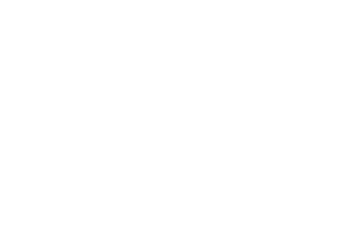

split_statement:['ดิว0', 'requests', 'กิน0']
process_num:0 keyword:requests resource_num:10
ดิว0 requests กิน0

p0 now holds r0
owned_edges:[(10, 0)]


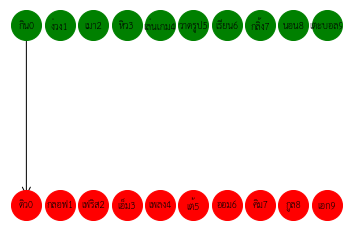

split_statement:['กลอฟ1', 'requests', 'ง่วง1']
process_num:1 keyword:requests resource_num:11
กลอฟ1 requests ง่วง1

x:(10, 0)
x[0]:10 resource_num:11 resource_owned:False
p1 now holds r1
owned_edges:[(10, 0), (11, 1)]


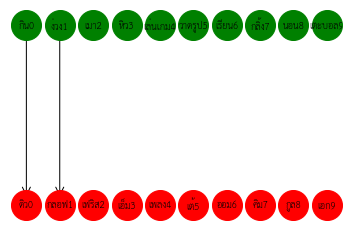

split_statement:['เฟริส2', 'requests', 'เมา2']
process_num:2 keyword:requests resource_num:12
เฟริส2 requests เมา2

x:(10, 0)
x[0]:10 resource_num:12 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:12 resource_owned:False
p2 now holds r2
owned_edges:[(10, 0), (11, 1), (12, 2)]


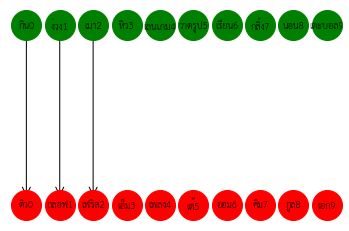

split_statement:['เอ็ม3', 'requests', 'หิว3']
process_num:3 keyword:requests resource_num:13
เอ็ม3 requests หิว3

x:(10, 0)
x[0]:10 resource_num:13 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:13 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:13 resource_owned:False
p3 now holds r3
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3)]


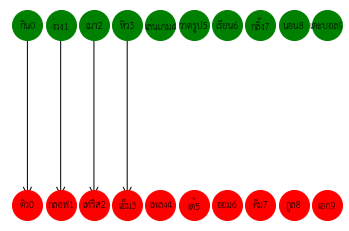

split_statement:['เพลง4', 'requests', 'เล่นเกม4']
process_num:4 keyword:requests resource_num:14
เพลง4 requests เล่นเกม4

x:(10, 0)
x[0]:10 resource_num:14 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:14 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:14 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:14 resource_owned:False
p4 now holds r4
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4)]


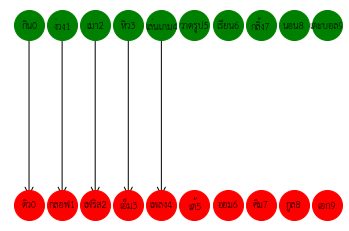

split_statement:['เต้5', 'requests', 'วาดรูป5']
process_num:5 keyword:requests resource_num:15
เต้5 requests วาดรูป5

x:(10, 0)
x[0]:10 resource_num:15 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:15 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:15 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:15 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:15 resource_owned:False
p5 now holds r5
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5)]


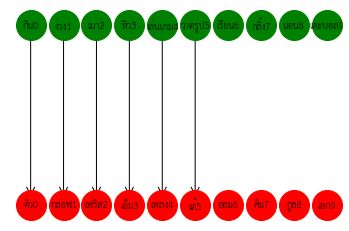

split_statement:['ออม6', 'requests', 'เรียน6']
process_num:6 keyword:requests resource_num:16
ออม6 requests เรียน6

x:(10, 0)
x[0]:10 resource_num:16 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:16 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:16 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:16 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:16 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:16 resource_owned:False
p6 now holds r6
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6)]


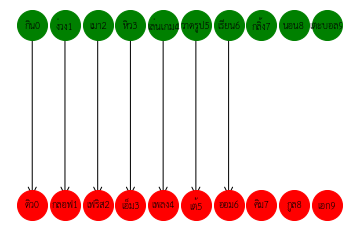

split_statement:['คิม7', 'requests', 'กลิ้ง7']
process_num:7 keyword:requests resource_num:17
คิม7 requests กลิ้ง7

x:(10, 0)
x[0]:10 resource_num:17 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:17 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:17 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:17 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:17 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:17 resource_owned:False
x:(16, 6)
x[0]:16 resource_num:17 resource_owned:False
p7 now holds r7
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 7)]


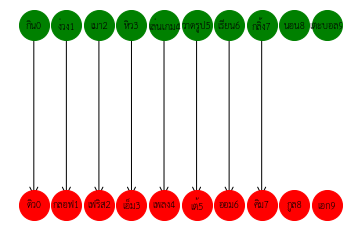

split_statement:['กูล8', 'requests', 'นอน8']
process_num:8 keyword:requests resource_num:18
กูล8 requests นอน8

x:(10, 0)
x[0]:10 resource_num:18 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:18 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:18 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:18 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:18 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:18 resource_owned:False
x:(16, 6)
x[0]:16 resource_num:18 resource_owned:False
x:(17, 7)
x[0]:17 resource_num:18 resource_owned:False
p8 now holds r8
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 7), (18, 8)]


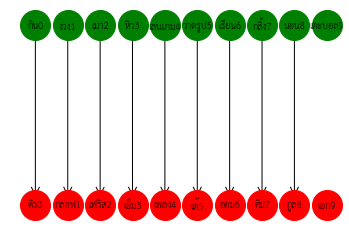

split_statement:['เอก9', 'requests', 'เตะบอล9']
process_num:9 keyword:requests resource_num:19
เอก9 requests เตะบอล9
x:(10, 0)
x[0]:10 resource_num:19 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:19 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:19 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:19 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:19 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:19 resource_owned:False
x:(16, 6)
x[0]:16 resource_num:19 resource_owned:False
x:(17, 7)
x[0]:17 resource_num:19 resource_owned:False
x:(18, 8)
x[0]:18 resource_num:19 resource_owned:False
p9 now holds r9
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 7), (18, 8), (19, 9)]


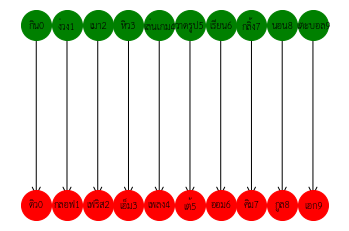

In [15]:
RM.simulate2()

In [16]:
print(f"Request_edges: {RM.getRequest_edges()}")
print(f"Owned_edges: {RM.getOwned_edges()}")

Request_edges: []
Owned_edges: [(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 7), (18, 8), (19, 9)]


# **Deadlock**

In [24]:
#if __name__ == '__main__':
input2 = '/content/drive/MyDrive/CIS452-Resource-Manager/dead.txt'#dead lock
RM = ResourceManager(input2)

In [25]:
print(f"NumberProcesses : {RM.getNumberProcesses()}")
print(f"NumberResources : {RM.getNumberResources()}")
print(f"Request_edges: {RM.getResource_list()}")
print(f"Owned_edges: {RM.getProcess_list()}")

NumberProcesses : 10
NumberResources : 10
Request_edges: ['กิน', 'ง่วง', 'เมา', 'หิว', 'เล่นเกม', 'วาดรูป', 'เรียน', 'กลิ้ง', 'นอน', 'เตะบอล', 'กระโดด', 'วิ่ง', 'หลับ', 'เหงา', 'หายไป']
Owned_edges: ['ดิว', 'กลอฟ', 'เฟริส', 'เอ็ม', 'เพลง', 'เต้', 'ออม', 'คิม', 'กูล', 'เอก', 'เกม', 'บัน', 'แก้ว', 'คำ', 'ดำ', 'แดง', 'เขียว', 'เหลือง', 'ม่วง']


In [26]:
#RM.get_parameters()

In [27]:
RM.get_thai_parameters()

split_statement:['ดิว0', 'requests', 'กิน0']
process_num:0 keyword:requests resource_num:10


(0, 'requests', 10, 10)

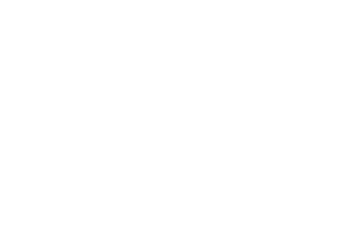

split_statement:['ดิว0', 'requests', 'กิน0']
process_num:0 keyword:requests resource_num:10
ดิว0 requests กิน0

p0 now holds r0
owned_edges:[(10, 0)]


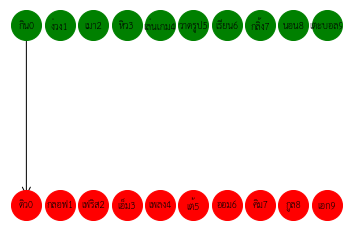

split_statement:['กลอฟ1', 'requests', 'ง่วง1']
process_num:1 keyword:requests resource_num:11
กลอฟ1 requests ง่วง1

x:(10, 0)
x[0]:10 resource_num:11 resource_owned:False
p1 now holds r1
owned_edges:[(10, 0), (11, 1)]


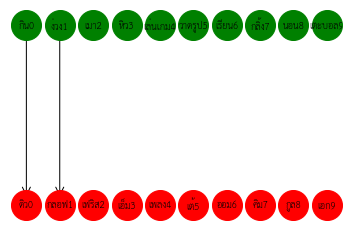

split_statement:['เฟริส2', 'requests', 'เมา2']
process_num:2 keyword:requests resource_num:12
เฟริส2 requests เมา2

x:(10, 0)
x[0]:10 resource_num:12 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:12 resource_owned:False
p2 now holds r2
owned_edges:[(10, 0), (11, 1), (12, 2)]


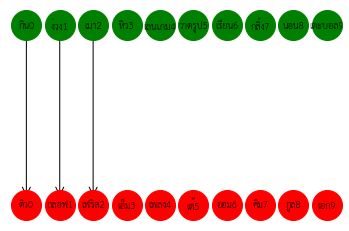

split_statement:['เอ็ม3', 'requests', 'หิว3']
process_num:3 keyword:requests resource_num:13
เอ็ม3 requests หิว3

x:(10, 0)
x[0]:10 resource_num:13 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:13 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:13 resource_owned:False
p3 now holds r3
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3)]


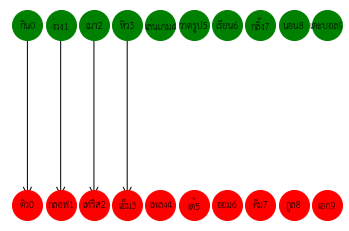

split_statement:['เพลง4', 'requests', 'เล่นเกม4']
process_num:4 keyword:requests resource_num:14
เพลง4 requests เล่นเกม4

x:(10, 0)
x[0]:10 resource_num:14 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:14 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:14 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:14 resource_owned:False
p4 now holds r4
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4)]


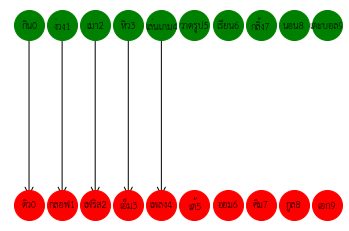

split_statement:['เต้5', 'requests', 'วาดรูป5']
process_num:5 keyword:requests resource_num:15
เต้5 requests วาดรูป5

x:(10, 0)
x[0]:10 resource_num:15 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:15 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:15 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:15 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:15 resource_owned:False
p5 now holds r5
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5)]


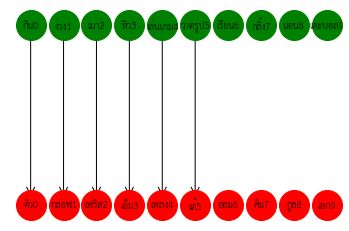

split_statement:['ออม6', 'requests', 'เรียน6']
process_num:6 keyword:requests resource_num:16
ออม6 requests เรียน6

x:(10, 0)
x[0]:10 resource_num:16 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:16 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:16 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:16 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:16 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:16 resource_owned:False
p6 now holds r6
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6)]


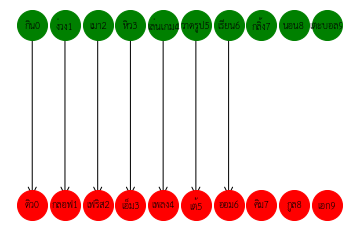

split_statement:['คิม7', 'requests', 'กลิ้ง7']
process_num:7 keyword:requests resource_num:17
คิม7 requests กลิ้ง7

x:(10, 0)
x[0]:10 resource_num:17 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:17 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:17 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:17 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:17 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:17 resource_owned:False
x:(16, 6)
x[0]:16 resource_num:17 resource_owned:False
p7 now holds r7
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 7)]


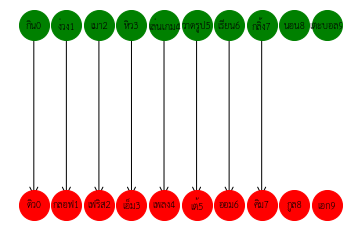

split_statement:['กูล8', 'requests', 'นอน8']
process_num:8 keyword:requests resource_num:18
กูล8 requests นอน8

x:(10, 0)
x[0]:10 resource_num:18 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:18 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:18 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:18 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:18 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:18 resource_owned:False
x:(16, 6)
x[0]:16 resource_num:18 resource_owned:False
x:(17, 7)
x[0]:17 resource_num:18 resource_owned:False
p8 now holds r8
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 7), (18, 8)]


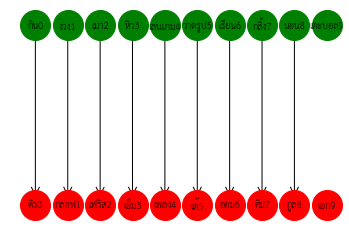

split_statement:['เอก9', 'requests', 'เตะบอล9']
process_num:9 keyword:requests resource_num:19
เอก9 requests เตะบอล9

x:(10, 0)
x[0]:10 resource_num:19 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:19 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:19 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:19 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:19 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:19 resource_owned:False
x:(16, 6)
x[0]:16 resource_num:19 resource_owned:False
x:(17, 7)
x[0]:17 resource_num:19 resource_owned:False
x:(18, 8)
x[0]:18 resource_num:19 resource_owned:False
p9 now holds r9
owned_edges:[(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 7), (18, 8), (19, 9)]


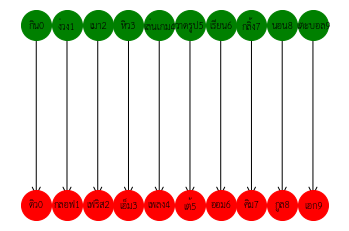

split_statement:['เกม0', 'requests', 'กระโดด1']
process_num:0 keyword:requests resource_num:11
เกม0 requests กระโดด1

x:(10, 0)
x[0]:10 resource_num:11 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:11 resource_owned:True
request_edges:[(0, 11)]


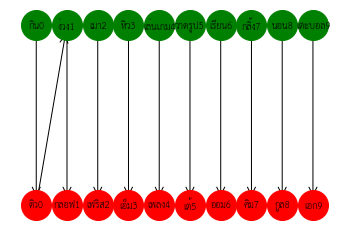

split_statement:['บัน0', 'requests', 'วิ่ง2']
process_num:0 keyword:requests resource_num:12
บัน0 requests วิ่ง2

x:(10, 0)
x[0]:10 resource_num:12 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:12 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:12 resource_owned:True
request_edges:[(0, 11), (0, 12)]


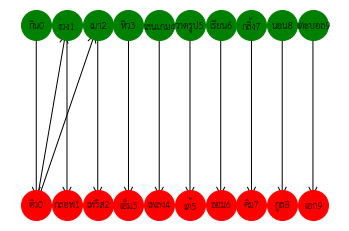

split_statement:['แก้ว1', 'requests', 'หลับ0']
process_num:1 keyword:requests resource_num:10
แก้ว1 requests หลับ0

x:(10, 0)
x[0]:10 resource_num:10 resource_owned:True
request_edges:[(0, 11), (0, 12), (1, 10)]
These processes are deadlocked: 0, 1


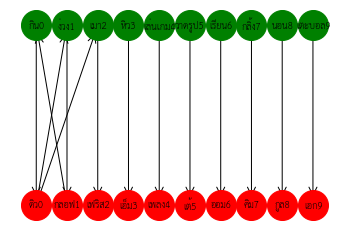

split_statement:['คำ1', 'requests', 'ง่วง2']
process_num:1 keyword:requests resource_num:12
p1 is deadlocked, ignore statement 'คำ1 requests ง่วง2
'
These processes are deadlocked: 0, 1


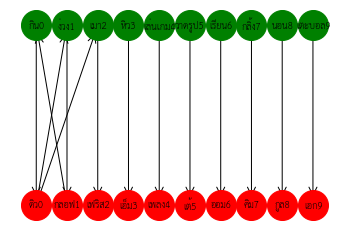

split_statement:['ดำ2', 'requests', 'เหงา1']
process_num:2 keyword:requests resource_num:11
ดำ2 requests เหงา1

x:(10, 0)
x[0]:10 resource_num:11 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:11 resource_owned:True
request_edges:[(0, 11), (0, 12), (1, 10), (2, 11)]
These processes are deadlocked: 0, 2, 1


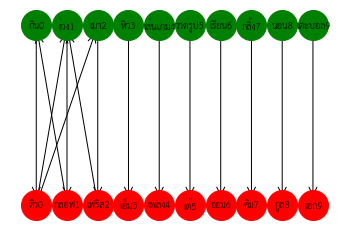

split_statement:['แดง4', 'requests', 'หายไป7']
process_num:4 keyword:requests resource_num:17
แดง4 requests หายไป7

x:(10, 0)
x[0]:10 resource_num:17 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:17 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:17 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:17 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:17 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:17 resource_owned:False
x:(16, 6)
x[0]:16 resource_num:17 resource_owned:False
x:(17, 7)
x[0]:17 resource_num:17 resource_owned:True
request_edges:[(0, 11), (0, 12), (1, 10), (2, 11), (4, 17)]
These processes are deadlocked: 0, 2, 1


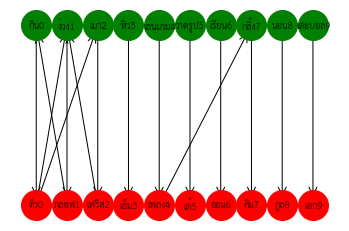

split_statement:['เขียว8', 'requests', 'หายไป7']
process_num:8 keyword:requests resource_num:17
เขียว8 requests หายไป7

x:(10, 0)
x[0]:10 resource_num:17 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:17 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:17 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:17 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:17 resource_owned:False
x:(15, 5)
x[0]:15 resource_num:17 resource_owned:False
x:(16, 6)
x[0]:16 resource_num:17 resource_owned:False
x:(17, 7)
x[0]:17 resource_num:17 resource_owned:True
request_edges:[(0, 11), (0, 12), (1, 10), (2, 11), (4, 17), (8, 17)]
These processes are deadlocked: 0, 2, 1


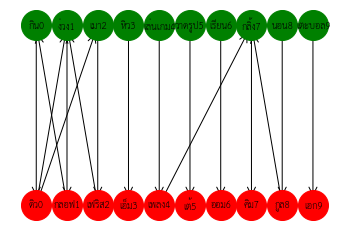

split_statement:['เหลือง7', 'requests', 'เล่นเกม4']
process_num:7 keyword:requests resource_num:14
เหลือง7 requests เล่นเกม4

x:(10, 0)
x[0]:10 resource_num:14 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:14 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:14 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:14 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:14 resource_owned:True
request_edges:[(0, 11), (0, 12), (1, 10), (2, 11), (4, 17), (8, 17), (7, 14)]
These processes are deadlocked: 7, 4, 0, 2, 1


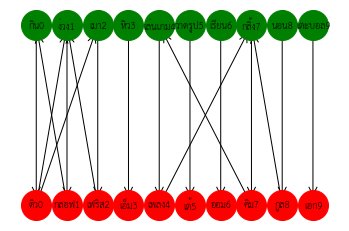

split_statement:['ม่วง8', 'requests', 'เล่นเกม4']
process_num:8 keyword:requests resource_num:14
ม่วง8 requests เล่นเกม4
x:(10, 0)
x[0]:10 resource_num:14 resource_owned:False
x:(11, 1)
x[0]:11 resource_num:14 resource_owned:False
x:(12, 2)
x[0]:12 resource_num:14 resource_owned:False
x:(13, 3)
x[0]:13 resource_num:14 resource_owned:False
x:(14, 4)
x[0]:14 resource_num:14 resource_owned:True
request_edges:[(0, 11), (0, 12), (1, 10), (2, 11), (4, 17), (8, 17), (7, 14), (8, 14)]
These processes are deadlocked: 7, 4, 0, 2, 1


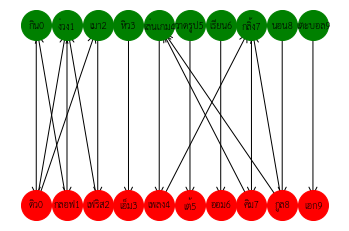

In [28]:
RM.simulate2()

In [29]:
print(f"Request_edges: {RM.getRequest_edges()}")
print(f"Owned_edges: {RM.getOwned_edges()}")

Request_edges: [(0, 11), (0, 12), (1, 10), (2, 11), (4, 17), (8, 17), (7, 14), (8, 14)]
Owned_edges: [(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 7), (18, 8), (19, 9)]
